<a href="https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/multipleMinimumFrequentPatterns/basic/CFPGrowthPlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Frequent patterns in Transactional Databases using CFPGrowthPlus Algorithm

In this tutorial, we will discuss the first approaches to find frequent patterns in big data using CFPGrowthPlus algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single beta value

***

## <a id='basicApproach'>Basic approach: Executing CFPGrowthPlus on a single dataset at a particular beta value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 14.4 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=7cc16b0536a2260337eb6b0e17554f45a52667f9bec90c27d8f6ee47a1336460
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=62879e3f5f45489f5b5b4af24087cfa2a79ac12840bbf383246fc8ea91de88fe
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


#### Step 0.1 : Downloading the inputFile

In [2]:
!wget https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv

--2023-11-28 16:59:37--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M   715KB/s    in 5.5s    

2023-11-28 16:59:44 (715 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



#### Step 0.2 : Creating an MIS_T10.txt File

In [3]:
from PAMI.extras.calculateMISValues import usingBeta as ub
inputFile = "Transactional_T10I4D100K.csv"
beta = 1.8
LS = 500
sep = "\t"
output = "MIS_T10.txt"
cd = ub.usingBeta(inputFile, beta, LS, sep)
cd.calculateMIS()
cd.save(output)

#### Step 1: Import the CFPGrowthPlus algorithm

In [4]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowthPlus as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Transactional_T10I4D100K.csv'

MIS = 'MIS_T10.txt'

seperator='\t'

#### Step 3: Execute the CFPGrowthPlus algorithm

In [6]:
obj = alg.CFPGrowthPlus(iFile=inputFile, MIS=MIS, sep=seperator)    #initialize
obj.mine()            #Start the mining process

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 535


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 21.697412967681885


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 579268608
Memory (USS): 556744704


# Advanced Tutorial on Implementing CFPGrowthPlus Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using CFPGrowthPlus algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple beta values.

***

#### In this tutorial, we explain how the CFPGrowthPlus algorithm can be implemented by varying the beta values

#### Step 1: Import the CFPGrowthPlus algorithm and pandas data frame

In [12]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowthPlus as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [26]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
betaList = [0.1, 1.0, 2.0, 3.0, 4.0]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CFPGrowthPlus algorithm

#### Step 3: Execute the CFPGrowthPlus algorithm using different beta values

In [27]:
for beta in betaList:
  from PAMI.extras.calculateMISValues import usingBeta as ub
  inputFile = "Transactional_T10I4D100K.csv"
  beta = beta
  LS = 500
  sep = "\t"
  output = "MIS_T10.txt"
  cd = ub.usingBeta(inputFile, beta, LS, sep)
  cd.calculateMIS()
  cd.save(output)
  obj = alg.CFPGrowthPlus(iFile=inputFile, MIS=MIS, sep=seperator)
  obj.mine()
#store the results in the data frame
  result.loc[result.shape[0]] = ['CFPGrowthPlus', beta, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [28]:
print(result)

       algorithm  minSup  patterns    runtime     memory
0  CFPGrowthPlus     0.1       535  18.040827  968515584
1  CFPGrowthPlus     1.0       535  18.141844  968916992
2  CFPGrowthPlus     2.0       535  14.467785  969056256
3  CFPGrowthPlus     3.0       535  20.823353  968949760
4  CFPGrowthPlus     4.0       535  17.642310  968609792


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [29]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

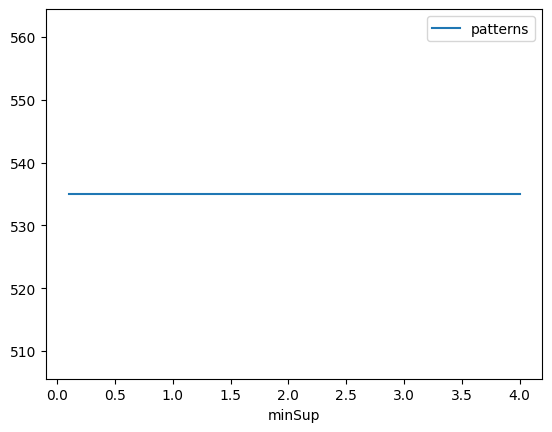

Graph for No Of Patterns is successfully generated!


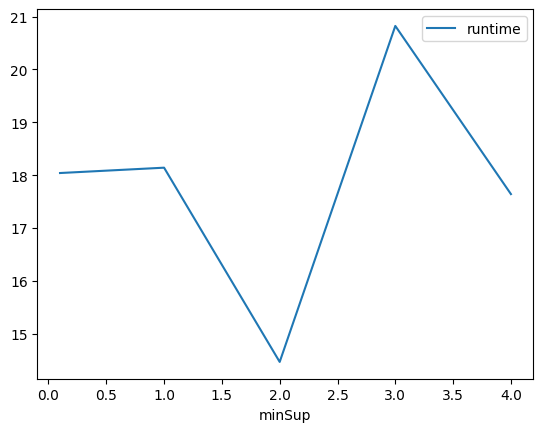

Graph for Runtime taken is successfully generated!


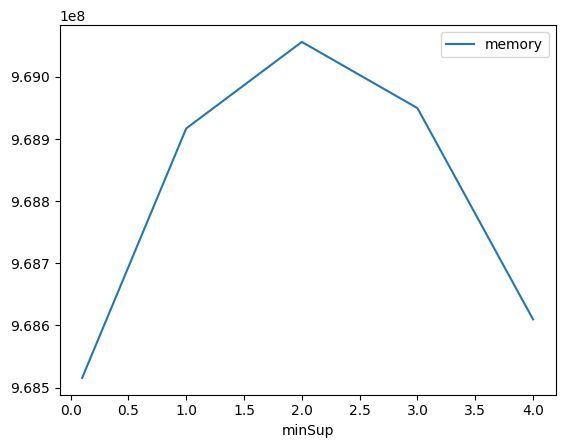

Graph for memory consumption is successfully generated!


In [30]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [25]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
